In [1]:
import pandas as pd
import duckdb as db


#  **A few Testing steps before dbt build** 

In [2]:
df = pd.read_csv('C:/Coding/dbt_project/yellow_taxi/seeds/zipcodes.csv')
df.head(5)


,country_code,zipcode,place,state,state_code,province,province_code,community,community_code,latitude,longitude
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914


In [3]:
query =  "select country_code,zipcode,place,state,state_code,province,province_code, latitude, longitude  from ( select *, ROW_NUMBER() over(partition by province_code order by zipcode) as rn from df ) as tb where state = 'New York' and rn = 1"
tt = db.sql(query)
tt

┌──────────────┬─────────┬────────────────┬──────────┬───┬──────────────┬───────────────┬──────────┬───────────┐
│ country_code │ zipcode │     place      │  state   │ … │   province   │ province_code │ latitude │ longitude │
│   varchar    │  int64  │    varchar     │ varchar  │   │   varchar    │    double     │  double  │  double   │
├──────────────┼─────────┼────────────────┼──────────┼───┼──────────────┼───────────────┼──────────┼───────────┤
│ US           │   10301 │ Staten Island  │ New York │ … │ Richmond     │          85.0 │  40.6316 │  -74.0927 │
│ US           │   12008 │ Alplaus        │ New York │ … │ Schenectady  │          93.0 │  42.8573 │  -73.9002 │
│ US           │   11201 │ Brooklyn       │ New York │ … │ Kings        │          47.0 │   40.694 │  -73.9903 │
│ US           │   12922 │ Childwold      │ New York │ … │ St. Lawrence │          89.0 │  44.2867 │  -74.6759 │
│ US           │   12801 │ Glens Falls    │ New York │ … │ Warren       │         113.0 │  43.31

In [4]:
query1 = "select count(province_code) as mycount from tt group by province_code having count(province_code) > 1"
db.sql(query1)

┌─────────┐
│ mycount │
│  int64  │
├─────────┤
│ 0 rows  │
└─────────┘

# **Data Analysis/Visualization** :

### At this stage our DBT model has been built, tested and validated with a Docs file generated

So the final step in this project is to plot a simple visual over our data

[Duckdb Help guide]('https://duckdb.org/docs/api/python/overview.html')

In [5]:
con = db.connect('dev.duckdb', read_only=True)
print(con.sql('select * from model3 limit 5'))


┌──────────┬──────────────────────┬──────────────────────┬─────────────────┬───┬───────────────┬──────────┬───────────┐
│ VendorID │ tpep_pickup_datetime │ tpep_dropoff_datet…  │ passenger_count │ … │ province_code │ latitude │ longitude │
│  int64   │      timestamp       │      timestamp       │     double      │   │     int32     │  double  │  double   │
├──────────┼──────────────────────┼──────────────────────┼─────────────────┼───┼───────────────┼──────────┼───────────┤
│        2 │ 2023-01-01 00:10:29  │ 2023-01-01 00:21:19  │             1.0 │ … │            79 │  41.4097 │  -73.5992 │
│        2 │ 2023-01-01 00:33:53  │ 2023-01-01 00:49:15  │             1.0 │ … │            61 │  40.7484 │  -73.9967 │
│        1 │ 2023-01-01 00:51:45  │ 2023-01-01 00:58:18  │             1.0 │ … │            79 │  41.4097 │  -73.5992 │
│        2 │ 2023-01-01 00:19:12  │ 2023-01-01 00:38:27  │             1.0 │ … │            87 │  41.1177 │  -74.1241 │
│        2 │ 2023-01-01 00:54:20  │ 2023

In [6]:
query = "select * from model3"
result = con.execute(query)

# Fetch the result as a Pandas DataFrame
df = result.fetchdf()

# Display the DataFrame
print(df.head())  


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
1         2  2023-01-01 00:33:53   2023-01-01 00:49:15              1.0   
2         1  2023-01-01 00:51:45   2023-01-01 00:58:18              1.0   
3         2  2023-01-01 00:19:12   2023-01-01 00:38:27              1.0   
4         2  2023-01-01 00:54:20   2023-01-01 00:56:49              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.43         1.0                  N           107            79   
1           2.95         1.0                  N            33            61   
2           1.40         1.0                  N           137            79   
3           5.70         1.0                  N           161            87   
4           0.60         1.0                  N           236            75   

   payment_type  ...  airport_fee  country_code  zipcode          place  \

In [7]:
print(df.columns)
print(df.describe)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'country_code',
       'zipcode', 'place', 'state', 'state_code', 'province', 'province_code',
       'latitude', 'longitude'],
      dtype='object')
<bound method NDFrame.describe of         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
1              2  2023-01-01 00:33:53   2023-01-01 00:49:15              1.0   
2              1  2023-01-01 00:51:45   2023-01-01 00:58:18              1.0   
3              2  2023-01-01 00:19:12   2023-01-01 00:38:27              1.0   
4              2  2023-01-01 00:54:20   2023-01-01 00:5

In [8]:
df = selected_columns = df[['DOLocationID', 'place', 'state', 'zipcode','latitude', 'longitude']]
df.head(20)

,DOLocationID,place,state,zipcode,latitude,longitude
0,79,Brewster,New York,10509,41.4097,-73.5992
1,61,New York,New York,10001,40.7484,-73.9967
2,79,Brewster,New York,10509,41.4097,-73.5992
3,87,Suffern,New York,10901,41.1177,-74.1241
4,75,Bernhards Bay,New York,13028,43.2717,-75.9373
5,79,Brewster,New York,10509,41.4097,-73.5992
6,43,Cold Brook,New York,13324,43.3024,-74.9977
7,61,New York,New York,10001,40.7484,-73.9967
8,43,Cold Brook,New York,13324,43.3024,-74.9977
9,79,Brewster,New York,10509,41.4097,-73.5992


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'DOLocationID' and count occurrences
grouped_df = df.groupby('DOLocationID').size().reset_index(name='count')

# Reset the index of the original DataFrame to prevent overlapping issue
df_reset_index = df.reset_index()

joined_df = grouped_df.join(df_reset_index, on='DOLocationID', how='left',lsuffix='_grouped', rsuffix='_original') #sufiix to prevent overlap
joined_df.head()



,DOLocationID,DOLocationID_grouped,count,index,DOLocationID_original,place,state,zipcode,latitude,longitude
0,43,43,28059,43,79,Brewster,New York,10509,41.4097,-73.5992
1,45,45,5248,45,107,Apalachin,New York,13732,42.0556,-76.1519
2,47,47,74,47,107,Apalachin,New York,13732,42.0556,-76.1519
3,49,49,3445,49,107,Apalachin,New York,13732,42.0556,-76.1519
4,51,51,95,51,79,Brewster,New York,10509,41.4097,-73.5992


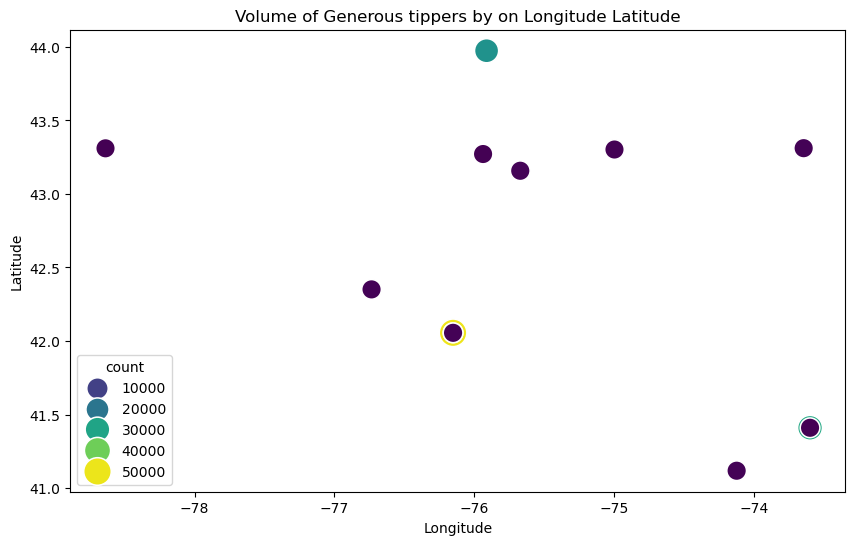

In [10]:
# Plot the counts on a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined_df, x='longitude', y='latitude', hue='count', size='count', sizes=(200, 400), palette='viridis', legend='auto')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Volume of Generous tippers by on Longitude Latitude')
plt.show()

# **Plot on real map using Folium**


In [11]:
#pip install folium

In [ ]:
import folium

# Create a map centered around New York
m = folium.Map(location=[40.7128, -74.0060], zoom_start=7)


# Add markers for each location with counts
for index, row in joined_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Location ID: {row['DOLocationID']}<br>Count: {row['count']}",
        icon=folium.Icon(color='blue')
    ).add_to(m)


In [13]:
#display the Map
m